# Exploitory Data Analysis

Columns: ['unnamed:_0', 'channelid', 'channeltitle', 'videoid', 'publishedat', 'videotitle', 'videodescription', 'videocategoryid', 'videocategorylabel', 'duration', 'durationsec', 'definition', 'caption', 'viewcount', 'likecount', 'dislikecount', 'commentcount']


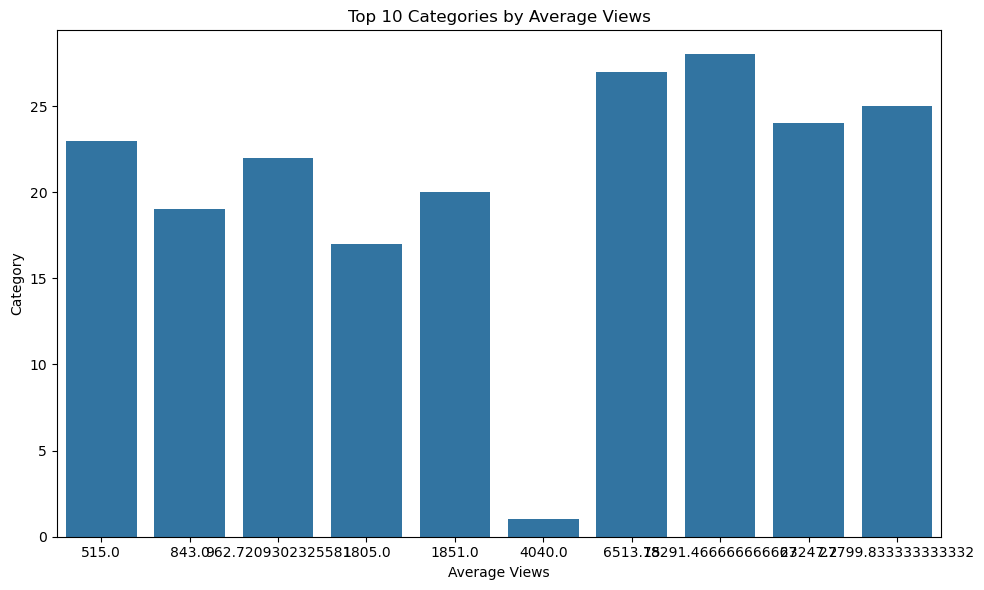


 Top 10 Videos by Like Ratio:
                    channeltitle  videocategoryid  like_ratio
54          The Awakened Brave!               22    0.075676
21                    MicroLife               10    0.066667
22   The Natural Way of Healing               24    0.061154
38   The Natural Way of Healing               22    0.056497
43                  trippyshore               22    0.048619
64             VIZAKIS MODALITY               27    0.045627
109         The Awakened Brave!               22    0.043077
7           Black Pigeon Speaks               25    0.039725
77          The Awakened Brave!               22    0.035573
6           Fabian-ji Chononita               22    0.035309
Tags column missing — skipping Step 3.
Video ID column missing — skipping Step 4.


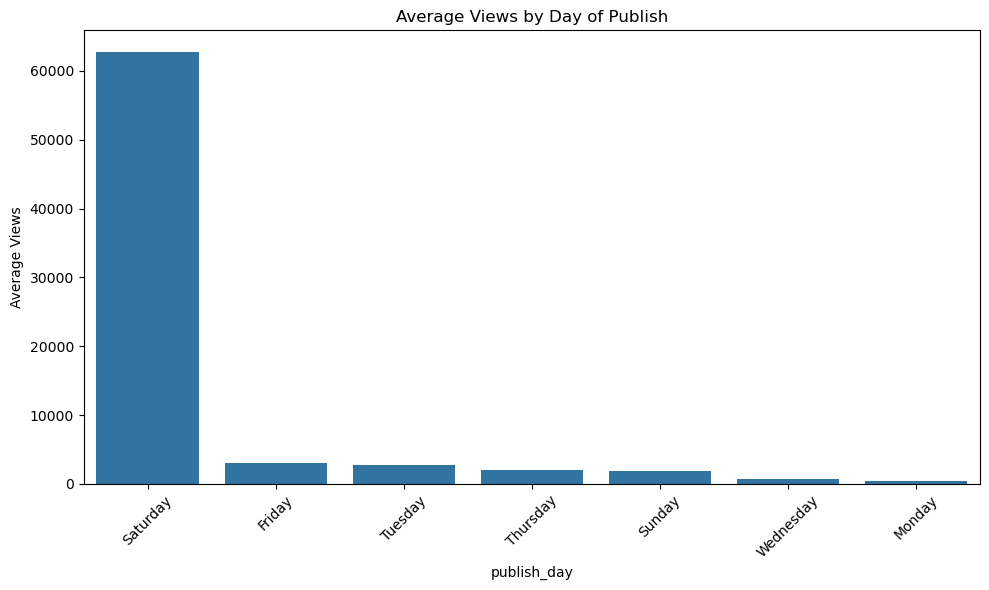

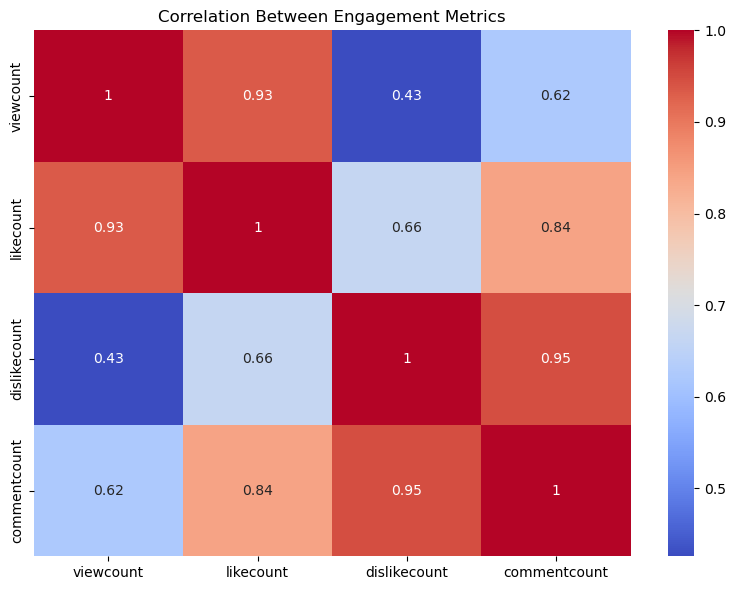

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load cleaned dataset
df = pd.read_csv("cleaned_youtube_trending.csv")

# Display column names for reference
print("Columns:", df.columns.tolist())

# ---------------------- Helper Functions ----------------------
def find_col(keyword):
    for col in df.columns:
        if keyword in col.lower():
            return col
    return None

# Auto-detect columns
views_col = find_col('view')
likes_col = find_col('like')
dislikes_col = find_col('dislike')
comments_col = find_col('comment')
tags_col = find_col('tag')
title_col = find_col('title')
category_col = find_col('category')
video_id_col = find_col('video_id')
publish_col = find_col('publish')

# ---------------------- Step 1: Top Categories by Avg Views ----------------------
if category_col and views_col:
    cat_views = df.groupby(category_col)[views_col].mean().sort_values(ascending=False).head(10)
    plot_df = cat_views.reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=plot_df, x=views_col, y=category_col)
    plt.title("Top 10 Categories by Average Views")
    plt.xlabel("Average Views")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()
else:
    print("Category or Views column missing — skipping Step 1.")

# ---------------------- Step 2: Like Ratio ----------------------
if likes_col and views_col:
    df['like_ratio'] = df[likes_col] / df[views_col]
    top_like_ratio = df.sort_values('like_ratio', ascending=False)[[title_col, category_col, 'like_ratio']].head(10)
    print("\n Top 10 Videos by Like Ratio:\n", top_like_ratio)
else:
    print("Likes or Views column missing — skipping Step 2.")

# ---------------------- Step 3: Most Common Tags ----------------------
if tags_col:
    all_tags = ','.join(df[tags_col].astype(str).tolist()).split('|')
    top_tags = Counter(all_tags).most_common(10)
    print("\n Most Common Tags:\n", top_tags)
else:
    print("Tags column missing — skipping Step 3.")

# ---------------------- Step 4: Trending Duration ----------------------
if video_id_col:
    trending_days = df[video_id_col].value_counts().reset_index()
    trending_days.columns = ['video_id', 'trending_days']
    print("\n Top 10 Videos by Trending Duration:\n", trending_days.head(10))
else:
    print("Video ID column missing — skipping Step 4.")

# ---------------------- Step 5: Views by Publish Day ----------------------
if publish_col:
    df[publish_col] = pd.to_datetime(df[publish_col], errors='coerce')
    df['publish_day'] = df[publish_col].dt.day_name()
    if views_col:
        views_by_day = df.groupby('publish_day')[views_col].mean().sort_values(ascending=False)
        plot_df = views_by_day.reset_index()
        plt.figure(figsize=(10, 6))
        sns.barplot(data=plot_df, x='publish_day', y=views_col)
        plt.title("Average Views by Day of Publish")
        plt.ylabel("Average Views")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print(" Published date column missing — skipping Step 5.")

# ---------------------- Step 6: Correlation Heatmap ----------------------
numerics = [col for col in [views_col, likes_col, dislikes_col, comments_col] if col in df.columns]
if len(numerics) >= 2:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numerics].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Between Engagement Metrics")
    plt.tight_layout()
    plt.show()
else:
    print(" Not enough numeric columns — skipping correlation heatmap.")